In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from nilearn.plotting import plot_design_matrix

%load_ext autoreload
%autoreload 2
from dd_kable_analysis.config_loader import load_config
from dd_kable_analysis.tseries_model.contrast_model import make_traditional_contrast_set
from dd_kable_analysis.tseries_model.design_matrix import (
    make_design_matrix_traditional,
)


## What is this?
A quick peek at the model and contrast used for the "traditional" modeling approach


In [2]:
cfg = load_config()

In [3]:
good_subs_csv = cfg.subject_lists / 'initial_qa_pass_subjects_runs.csv'
good_subs = pd.read_csv(good_subs_csv)

In [4]:
entry_num = 0
sub_id = good_subs['sub_id'][entry_num]
run = good_subs['run'][entry_num]
print(f'Subject: {sub_id}')

Subject: dmp0011


### Note: almost all subjects had the last trial removed because the scanning completed before the trial signal was captured.

❌ 1 trial for sub dmp0063, run 1 are clipped. Removing the trial and continuing.
(104, 14)


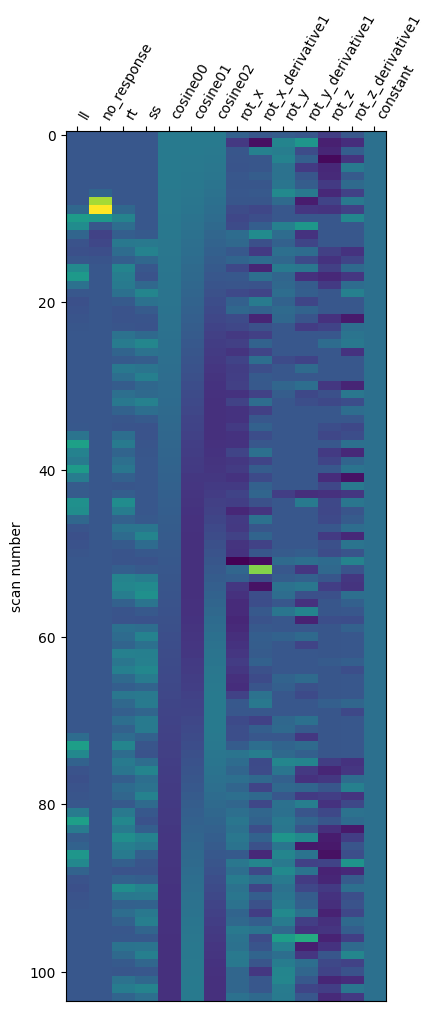

In [5]:
# sub/run with no response
sub_id = 'dmp0063'
run = 1


behav_data_trad, events_trad, desmat_trad = make_design_matrix_traditional(
    cfg, sub_id, run
)
print(desmat_trad.shape)
desmat_trad.head()


plot_design_matrix(desmat_trad)
plt.show()

In [6]:
behav_data_trad

,onset,duration,amount,Delay,choseAccept,RT,choseRight
0,18.504,4,58,72,NaN,NaN,NaN
1,23.570,4,33,103,1.0,2.149,0.0
2,33.603,4,44,143,0.0,1.844,1.0
3,42.636,4,58,55,1.0,2.674,0.0
4,49.669,4,56,172,0.0,1.513,1.0
5,67.735,4,52,139,0.0,1.926,1.0
6,78.767,4,29,44,0.0,1.798,1.0
7,88.817,4,77,161,0.0,1.908,1.0
8,103.850,4,74,52,1.0,1.906,0.0
9,112.883,4,75,41,1.0,1.793,0.0


In [7]:
events_trad

,onset,duration,trial_type
0,23.570,4.000,ll
1,33.603,4.000,ss
2,42.636,4.000,ll
3,49.669,4.000,ss
4,67.735,4.000,ss
5,78.767,4.000,ss
6,88.817,4.000,ss
7,103.850,4.000,ll
8,112.883,4.000,ll
9,125.915,4.000,ll


In [8]:
traditional_contrasts = make_traditional_contrast_set(desmat_trad)
print(traditional_contrasts)

{'ll_minus_ss': 'll - ss'}
